In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
# feature and target split

#X = df.drop("insuranceclaim", axis=1)
#y = df["insuranceclaim"]

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
# train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [8]:
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.81       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.81      0.80       402



In [9]:
## roc auc
from sklearn.metrics import confusion_matrix

prob = lr.predict_proba(X_test)[:,-1]

thresholds = [0.5,0.4,0.3,0.2,0.1]
tprs = []
fprs = []

In [10]:
for th in thresholds:
    y_pred = np.where(prob >= th, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    
    tprs.append(tpr)
    fprs.append(fpr)

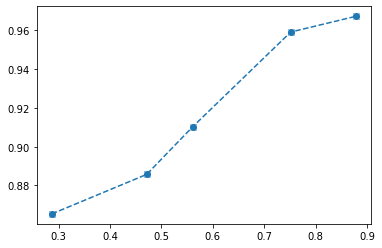

In [11]:
plt.figure()
plt.plot(fprs,tprs,"x--")
plt.scatter(fprs,tprs)
plt.show()

In [12]:
# final model
y_pred = np.where(prob >= 0.2, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.25      0.38       157
           1       0.67      0.96      0.79       245

    accuracy                           0.68       402
   macro avg       0.73      0.60      0.58       402
weighted avg       0.72      0.68      0.63       402



In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6037956583907448